In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [40]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [41]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_train['pixel100'].max()

255

In [43]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train.iloc[0, list(range(1,785))].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

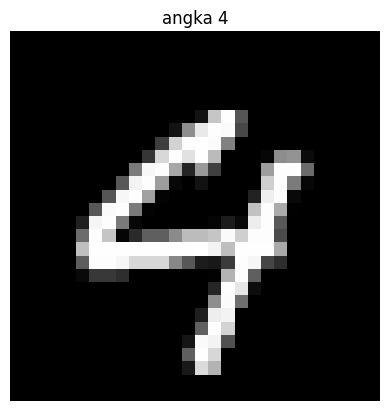

In [45]:
idx = 577
label = df_train['label'][idx]
img_vec = df_train.iloc[idx, list(range(1,785))].to_numpy()
img = img_vec.reshape((28,28)) #reshape menjadi 28 x 28

plt.title(f'angka {label}')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Data Preparation

In [46]:
y = df_train['label'].to_numpy()
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [47]:
X = df_train.drop('label', axis=1).to_numpy()
X_test = df_test.to_numpy()
print(X.shape, X_test.shape)

(42000, 784) (28000, 784)


In [48]:
#dataset split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(31500, 784) (31500,)
(10500, 784) (10500,)


In [49]:
#create standardized dataset using standard scaler
stdscl = StandardScaler()
stdscl.fit(X_train)
X_train_std = stdscl.transform(X_train)
X_val_std = stdscl.transform(X_val)

## Modeling

Machine Learning

In [50]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
score = accuracy_score(y_val, y_pred)
score

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8441904761904762

In [51]:
y_pred_test = svc.predict(X_test)

In [52]:
y_pred_test[:10]

array([2, 0, 9, 7, 3, 7, 0, 3, 0, 3], dtype=int64)

In [53]:
#create submission file
submit_dict = {
    'ImageId' : list(range(1, len(y_pred_test)+1)),
    'Label' : y_pred_test,

}
df_submit = pd.DataFrame(submit_dict)
df_submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [54]:
#create submission file with loop
submit_dict2 = {
    'ImageId' : [],
    "Label" : [],
}

for i, y in enumerate(y_pred_test):
    submit_dict2['ImageId'].append(i+1)
    submit_dict2['Label'].append(y)

df_submit2 = pd.DataFrame(submit_dict2)
df_submit2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [55]:
df_submit.to_csv('result.csv', index=False)

### Neural Network

In [56]:
import tensorflow as tf

In [60]:
onehot = OneHotEncoder()
onehot.fit(y_train.reshape(-1,1))
y_train_hot = onehot.transform(y_train.reshape(-1,1)).toarray()
y_val_hot = onehot.transform(y_val.reshape(-1,1)).toarray()

print(y_train.shape, y_train_hot.shape)
print(y_val.shape, y_val_hot.shape)

(31500,) (31500, 10)
(10500,) (10500, 10)


In [61]:
epoch = 120

model_nn= tf.keras.models.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(784,)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(10, activation='softmax')
  ]
)

model_nn.summary()


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=100, restore_best_weights=True)

#adam = tf.keras.optimizers.Adam(learning_rate=0.001)
sgd = tf.keras.optimizers.SGD(learning_rate=0.0001)
model_nn.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

history = model_nn.fit(
    X_train,
    y_train_hot,
    epochs=epoch,
    validation_data=(X_val, y_val_hot),
    batch_size=128,
    callbacks=[es]
    )

Epoch 1/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1109 - loss: 2.3033 - val_accuracy: 0.1121 - val_loss: 2.3295
Epoch 2/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1141 - loss: 2.3013 - val_accuracy: 0.1121 - val_loss: 2.3294
Epoch 3/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1071 - loss: 2.3015 - val_accuracy: 0.1121 - val_loss: 2.3294
Epoch 4/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1104 - loss: 2.3011 - val_accuracy: 0.1121 - val_loss: 2.3295
Epoch 5/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1109 - loss: 2.3013 - val_accuracy: 0.1121 - val_loss: 2.3294
Epoch 6/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1113 - loss: 2.3012 - val_accuracy: 0.1121 - val_loss: 2.3294
Epoch 7/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1073 - loss: 2.3015 - val_accuracy: 0.1121 - val_loss: 2.3294
Epoch 8/120
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1093 - loss: 2.3011 - val_accu

In [67]:
y_pred_test = model_nn.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [68]:
y_pred = tf.math.argmax(y_pred_test, axis=1)

In [69]:
print(y_pred_test[0])
print(y_pred.numpy()[0])

[0.10063238 0.10563024 0.10002209 0.10175847 0.09938622 0.09351642
 0.09730716 0.10262541 0.09858808 0.10053354]
1


In [70]:
y_pred = y_pred.numpy()
y_pred.shape

(28000,)

In [74]:
#create submission file
submit_dict = {
    'ImageId' : list(range(1, len(y_pred)+1)),
    'Label' : y_pred,

}
df_submit = pd.DataFrame(submit_dict)
df_submit.head()

,ImageId,Label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
